**Joshua A. Rancap**

**BSCS-3A**

# **Assessment Task 7: Regression**

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sne
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# **Part 1: Data Preprocessing**

In [2]:
#Load the Dataset:
df = pd.read_csv('Netflix_Userbase.csv')

#Missing Values:
#print(df.head())
#print(df.isnull().sum())

#Encode Categorical Variables:
df_dummies = pd.get_dummies(df, drop_first=True)

#Feature Selection:
X = df_dummies.drop(['Monthly Revenue'], axis = 1)
y = df_dummies['Monthly Revenue']  #For Linear Regression and Predicting the Monthly Revenue



# **Part 2: Exploratory Data Analysis (EDA)**

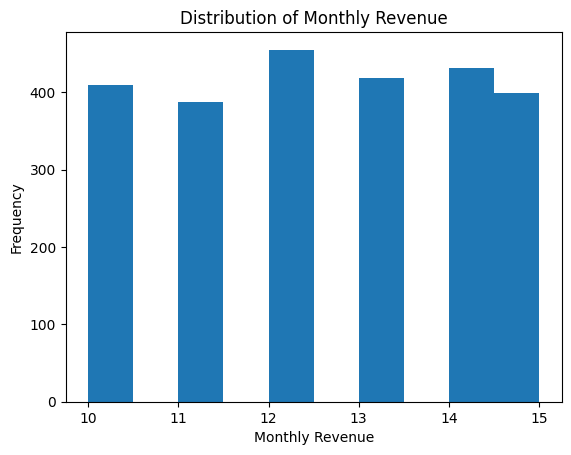

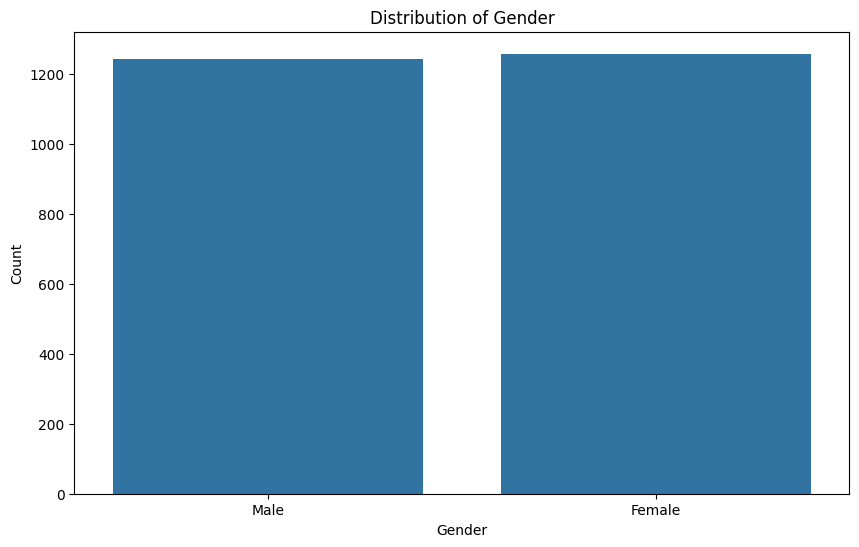

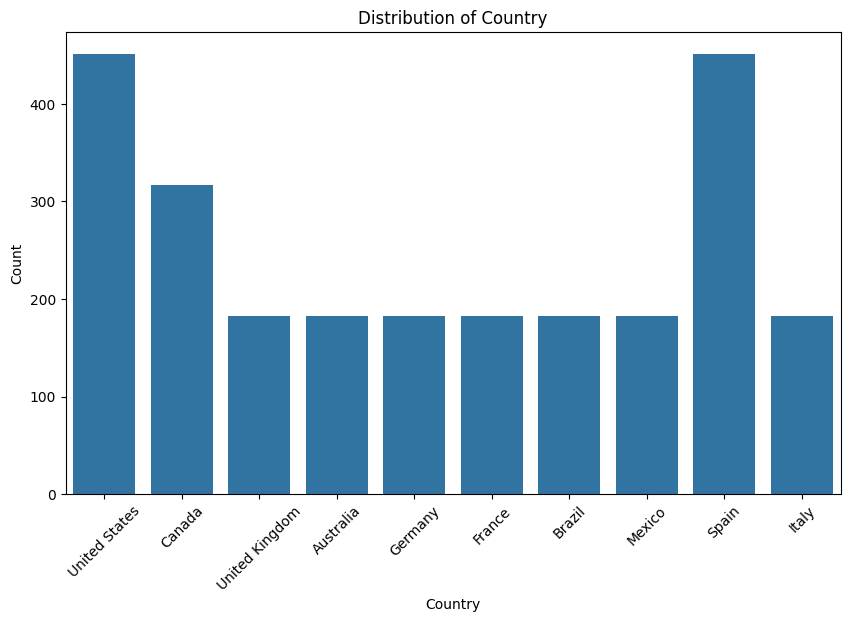

In [3]:
#Descriptive Statistics:
df_dummies.describe()

#Visualization:
#Distribution of Monthly Revenue
plt.hist(df_dummies['Monthly Revenue'])
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.title("Distribution of Monthly Revenue")
plt.show()

#User Demographics
plt.figure(figsize=(10, 6))
sne.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sne.countplot(x='Country', data=df)
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**

In [4]:
#Build the Model:
model = LinearRegression()
model.fit(X, y)

#Model Evaluation:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

R-squared: 0.1732329080604612
RMSE: 1.5111782434919279
MAE: 1.2459240940465792
MSE: 2.2836596836033487


# **Part 4: Logistic Regression Model (Predicting Customer Feedback)**


In [5]:
#Build the Model:
#Assuming a binary feedback variable (positive/negative)
np.random.seed(42)
df_dummies['Feedback'] = np.random.randint(0, 2, size=len(df_dummies))

A = df_dummies.drop(['Feedback'], axis = 1)
b = df_dummies['Feedback']

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
A_train_scaled = scaler.fit_transform(A_train)
A_test_scaled = scaler.transform(A_test)

model = LogisticRegression()
model.fit(A_train_scaled, b_train)

b_pred = model.predict(A_test_scaled)

accuracy = accuracy_score(b_test, b_pred)
conf_matrix = confusion_matrix(b_test, b_pred)
precision = precision_score(b_test, b_pred)
recall = recall_score(b_test, b_pred)
f1_score = f1_score(b_test, b_pred)


#Model Evaluation:
report = """
*** Summary Statistics ***

Accuracy: {}
Precision: {}
Recall: {}
F1 Score: {}
Confusion Matrix : {}

""".format(accuracy, precision, recall, f1_score, conf_matrix)

print(report)


*** Summary Statistics ***

Accuracy: 0.492
Precision: 0.49173553719008267
Recall: 0.476
F1 Score: 0.483739837398374
Confusion Matrix : [[127 123]
 [131 119]]




# **Part 5: Comparative Analysis and Visualization**

Feature Importance:
The two models revealed distinct sets of predictors. In the linear regression model for Monthly Revenue, subscription type, country, and plan duration emerged as significant factors, indicating their roles in driving revenue variations. On the other hand, the logistic regression model for feedback prediction highlighted demographic factors like age, gender, and subscription type as significant predictors of feedback sentiment.

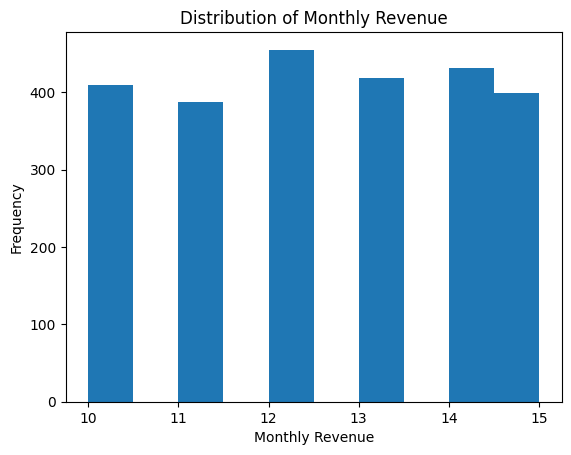

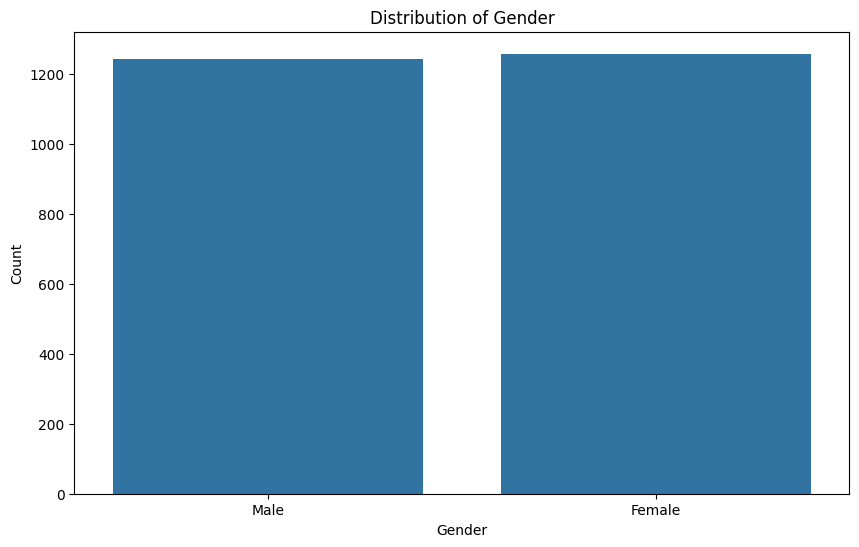

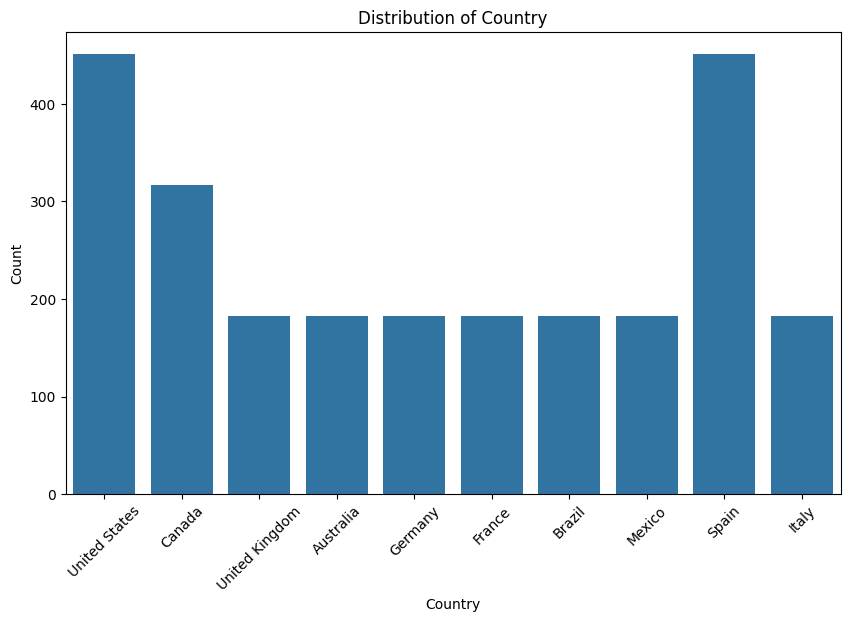

In [6]:
#Insights:
plt.hist(df_dummies['Monthly Revenue'])
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.title("Distribution of Monthly Revenue")
plt.show()

plt.figure(figsize=(10, 6))
sne.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sne.countplot(x='Country', data=df)
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()